<a href="https://colab.research.google.com/github/LissethGome3/Parcial--II/blob/main/Parcial_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#importacion de librerias a utilizar
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import csv 

from urllib import parse
from http.server import BaseHTTPRequestHandler, HTTPServer

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


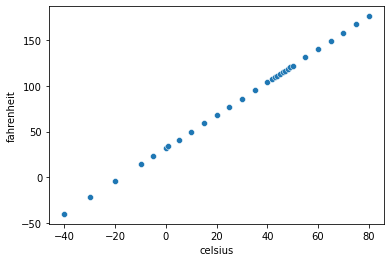

In [13]:
#obtencion de los datos de entrenamiento
archivo = pd.read_csv("dataset.csv", sep=";")
sb.scatterplot(archivo["celsius"], archivo["fahrenheit"])

In [14]:
#datos de entrada y salida
celsius = archivo["celsius"]
fahrenheit = archivo["fahrenheit"]

In [15]:
#modelo de entrenamiento
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

#compilar el modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(1), loss='mean_squared_error')

#entrenamiento del modelo
entrenamiento = modelo.fit(celsius, fahrenheit, epochs=350)


Epoch 1/350
1/1 [==============================] - 0s 257ms/step - loss: 29272.2793
Epoch 2/350
1/1 [==============================] - 0s 5ms/step - loss: 16377.6738
Epoch 3/350
1/1 [==============================] - 0s 5ms/step - loss: 7403.2646
Epoch 4/350
1/1 [==============================] - 0s 3ms/step - loss: 2230.1016
Epoch 5/350
1/1 [==============================] - 0s 3ms/step - loss: 430.9014
Epoch 6/350
1/1 [==============================] - 0s 4ms/step - loss: 1144.1368
Epoch 7/350
1/1 [==============================] - 0s 15ms/step - loss: 3126.0923
Epoch 8/350
1/1 [==============================] - 0s 5ms/step - loss: 5112.0200
Epoch 9/350
1/1 [==============================] - 0s 3ms/step - loss: 6265.0981
Epoch 10/350
1/1 [==============================] - 0s 4ms/step - loss: 6332.9087
Epoch 11/350
1/1 [==============================] - 0s 8ms/step - loss: 5494.8247
Epoch 12/350
1/1 [==============================] - 0s 4ms/step - loss: 4132.0513
Epoch 13/350
1/1 [===

In [ ]:
class servidor_basico(BaseHTTPRequestHandler):
    def do_GET(self):
        print("Peticion echa con GET")
        self.send_response(200)
        self.send_header('Content-type', 'text/html')
        self.end_headers()
        self.wfile.write('Hola mundo desde Pyhon'.encode())
        
    def do_POST(self):
        print('POST')
        content_length = int(self.headers['Content-Length'])
        data = self.rfile.read(content_length)
        data = data.decode()
        data = parse.unquote(data)
        data = float(data)
 
        #haciendo predicciones 
        predict = modelo.predict([data])
        print('La predicción es:', predict)
        predict = str(predict)
        
        self.send_response(200)
        self.send_header('Access-Control-Allow-Origin', '*')
        self.end_headers()
        self.wfile.write(predict.encode())

#Imprimir servidor 
print('Iniciando el servidor')
server = HTTPServer(('localhost', 3007), servidor_basico)
server.serve_forever()

Iniciando el servidor
